In [2]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 16.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [3]:
from sklearn.preprocessing import MinMaxScaler


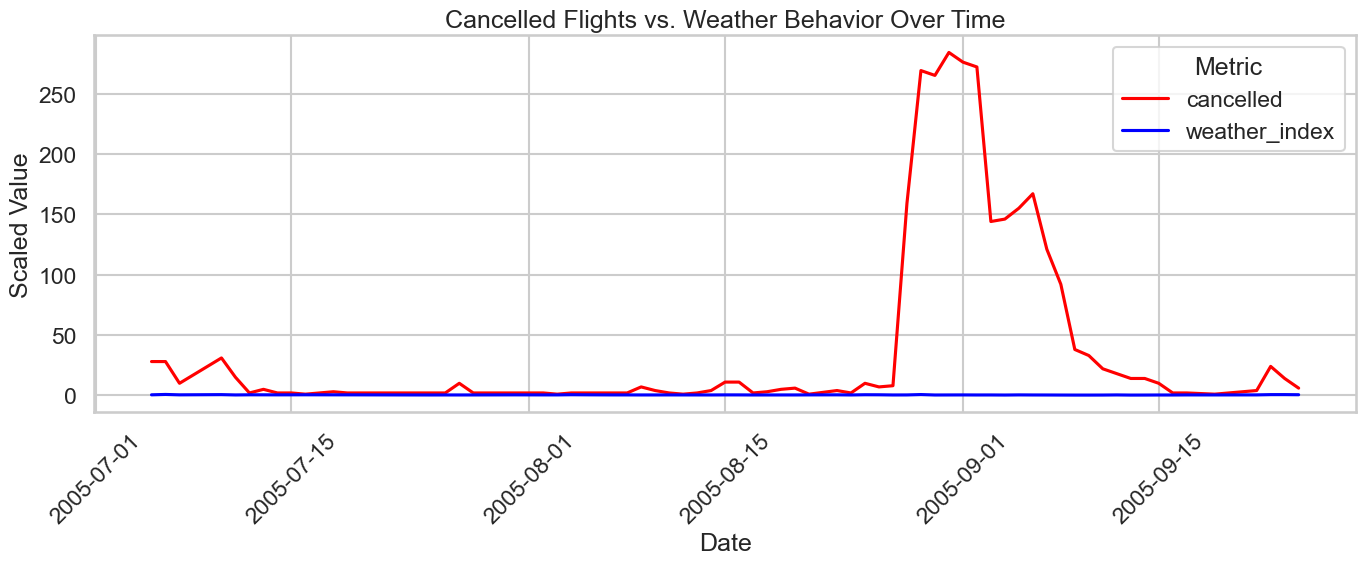

In [8]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load data from CSV
df = pd.read_csv("joined.csv", parse_dates=["date"])

# Step 3: Normalize weather features manually
weather_features = ["preci", "speed", "presh", "hum"]
df_norm = df.copy()
for col in weather_features:
    df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Step 4: Create a composite weather index
df_norm["weather_index"] = df_norm[weather_features].mean(axis=1)

# Step 5: Prepare data for plotting
plot_df = df_norm[["date", "cancelled", "weather_index"]].melt(
    id_vars="date",
    value_vars=["cancelled", "weather_index"],
    var_name="Metric",
    value_name="Value"
)

# Step 6: Plot with Seaborn
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x="date", y="Value", hue="Metric", palette=["red", "blue"])
plt.title("Cancelled Flights vs. Weather Behavior Over Time")
plt.xlabel("Date")
plt.ylabel("Scaled Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


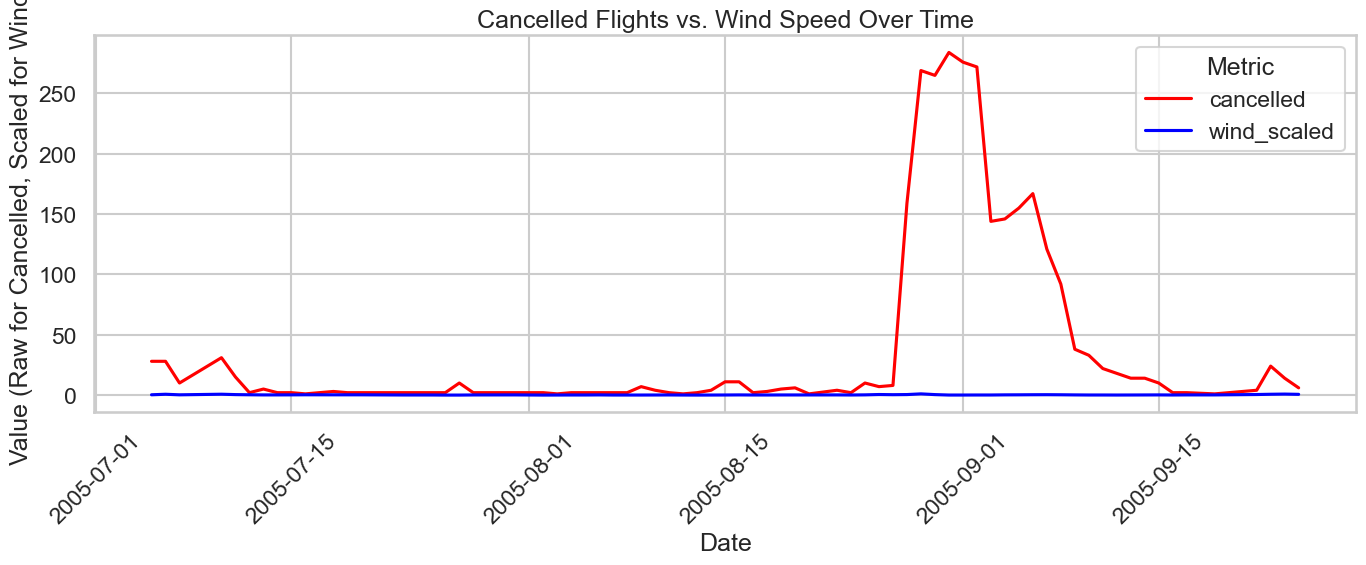

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("joined.csv", parse_dates=["date"])

# Normalize wind speed for comparison
df["wind_scaled"] = (df["speed"] - df["speed"].min()) / (df["speed"].max() - df["speed"].min())

# Prepare data for plotting
plot_df = df[["date", "cancelled", "wind_scaled"]].melt(
    id_vars="date",
    value_vars=["cancelled", "wind_scaled"],
    var_name="Metric",
    value_name="Value"
)

# Plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x="date", y="Value", hue="Metric", palette=["red", "blue"])
plt.title("Cancelled Flights vs. Wind Speed Over Time")
plt.xlabel("Date")
plt.ylabel("Value (Raw for Cancelled, Scaled for Wind)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


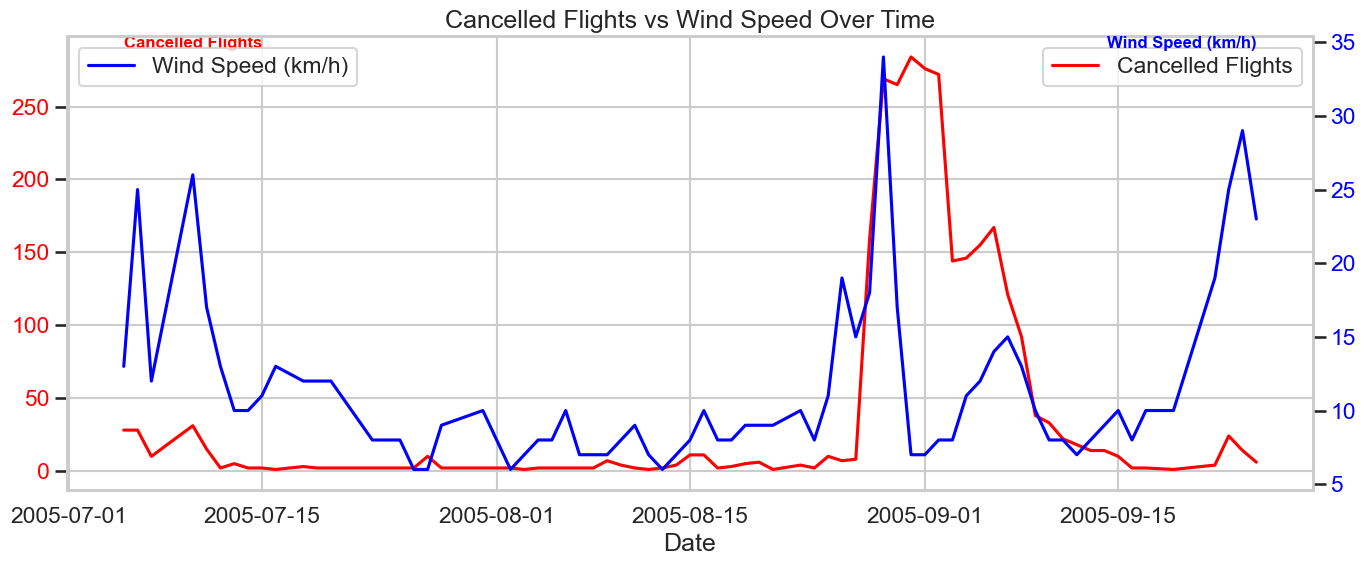

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("joined.csv", parse_dates=["date"])

# Set up the plot
sns.set(style="whitegrid", context="talk")
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot cancelled flights on primary y-axis
sns.lineplot(data=df, x="date", y="cancelled", ax=ax1, color="red", label="Cancelled Flights")
ax1.set_ylabel("Cancelled Flights", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create secondary y-axis for wind speed
ax2 = ax1.twinx()
sns.lineplot(data=df, x="date", y="speed", ax=ax2, color="blue", label="Wind Speed (km/h)")
ax2.set_ylabel("Wind Speed (km/h)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")
ax2.grid(False)

# Remove default y-axis labels
ax1.set_ylabel("")
ax2.set_ylabel("")

# Manually place labels
ax1.text(df["date"].min(), ax1.get_ylim()[1], "Cancelled Flights", color="red", ha="left", va="top", fontsize=12, weight="bold")

ax2.text(df["date"].max(), ax2.get_ylim()[1], "Wind Speed (km/h)", color="blue", ha="right", va="top", fontsize=12, weight="bold")


# Final touches
plt.title("Cancelled Flights vs Wind Speed Over Time")
ax1.set_xlabel("Date")
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


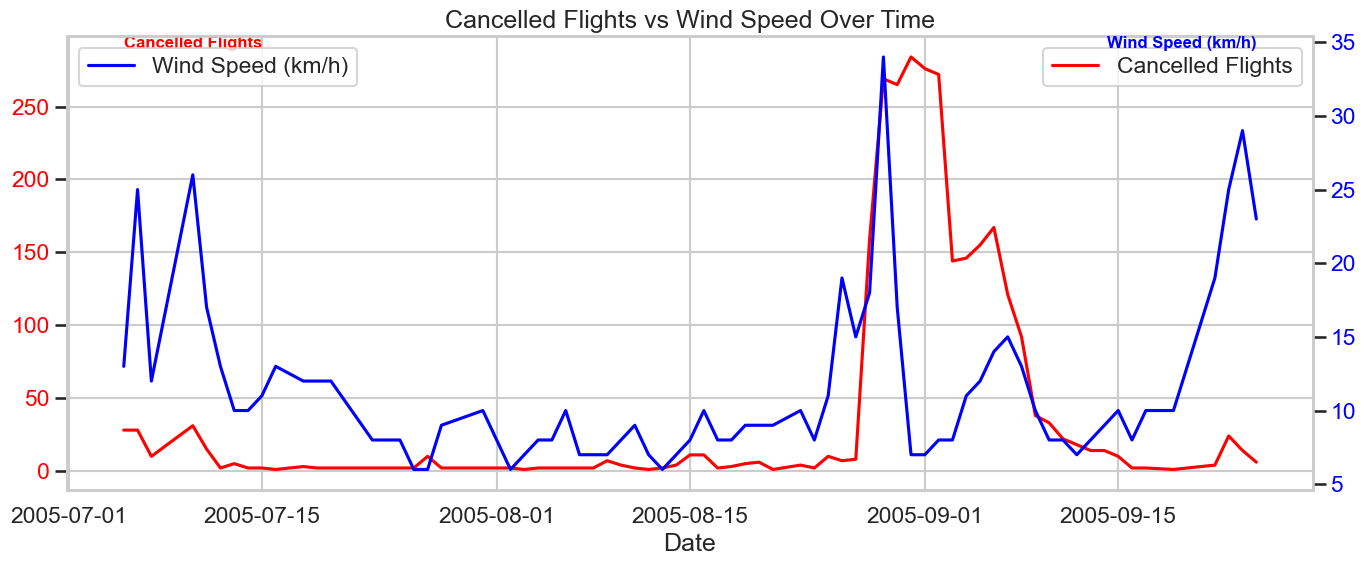

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("joined.csv", parse_dates=["date"])

# Set up the plot
sns.set(style="whitegrid", context="talk")
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot cancelled flights on primary y-axis
sns.lineplot(data=df, x="date", y="cancelled", ax=ax1, color="red", label="Cancelled Flights")
ax1.set_ylabel("Cancelled Flights", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create secondary y-axis for wind speed
ax2 = ax1.twinx()
sns.lineplot(data=df, x="date", y="speed", ax=ax2, color="blue", label="Wind Speed (km/h)")
ax2.set_ylabel("Wind Speed (km/h)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")
ax2.grid(False)

# Remove default y-axis labels
ax1.set_ylabel(None)
ax2.set_ylabel(None)

# Manually place labels
ax1.text(df["date"].min(), ax1.get_ylim()[1], "Cancelled Flights", color="red", ha="left", va="top", fontsize=12, weight="bold")
ax2.text(df["date"].max(), ax2.get_ylim()[1], "Wind Speed (km/h)", color="blue", ha="right", va="top", fontsize=12, weight="bold")


# Final touches
plt.title("Cancelled Flights vs Wind Speed Over Time")
ax1.set_xlabel("Date")
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


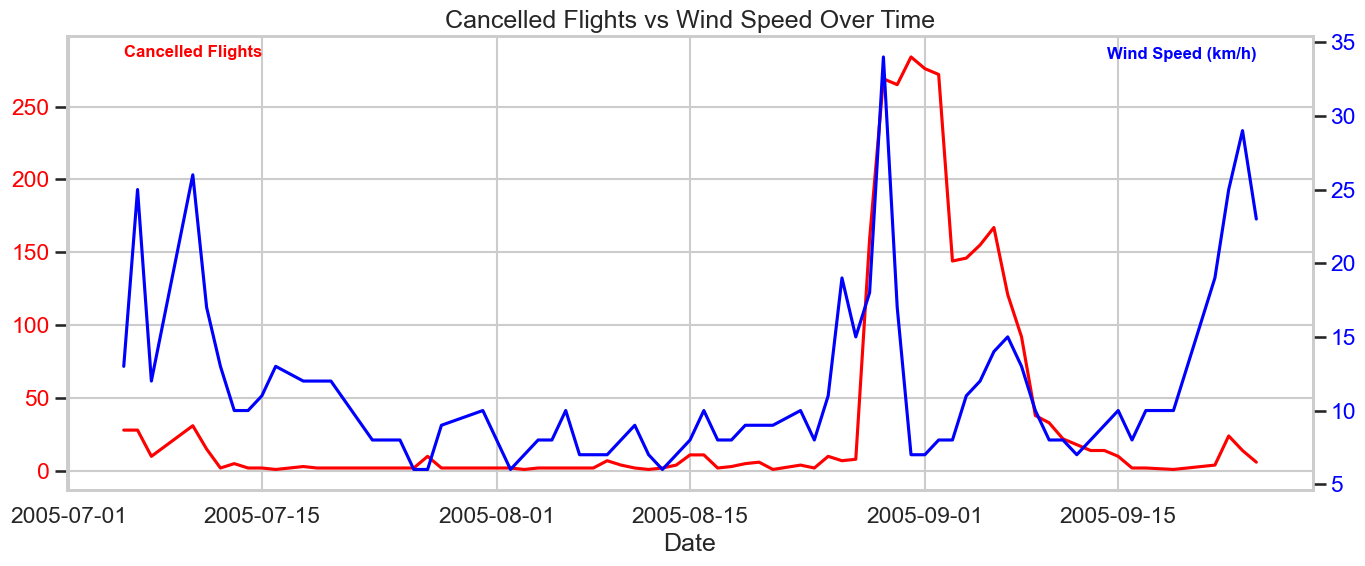

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("joined.csv", parse_dates=["date"])

# Set up the plot
sns.set(style="whitegrid", context="talk")
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot cancelled flights on primary y-axis
line1 = sns.lineplot(data=df, x="date", y="cancelled", ax=ax1, color="red")
line1.set(ylabel=None)  # 👈 Suppress Seaborn's auto-label
ax1.tick_params(axis="y", labelcolor="red")

# Plot wind speed on secondary y-axis
ax2 = ax1.twinx()
line2 = sns.lineplot(data=df, x="date", y="speed", ax=ax2, color="blue")
line2.set(ylabel=None)  # 👈 Suppress Seaborn's auto-label
ax2.tick_params(axis="y", labelcolor="blue")
ax2.grid(False)

# Manually place labels
# Cancelled Flights label (upper left, just below top)
ax1.text(df["date"].min(), ax1.get_ylim()[1] * 0.98, "Cancelled Flights", color="red",
         ha="left", va="top", fontsize=12, weight="bold")

# Wind Speed label (upper right, just below top)
ax2.text(df["date"].max(), ax2.get_ylim()[1] * 0.98, "Wind Speed (km/h)", color="blue",
         ha="right", va="top", fontsize=12, weight="bold")


# Final touches
plt.title("Cancelled Flights vs Wind Speed Over Time")
ax1.set_xlabel("Date")
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


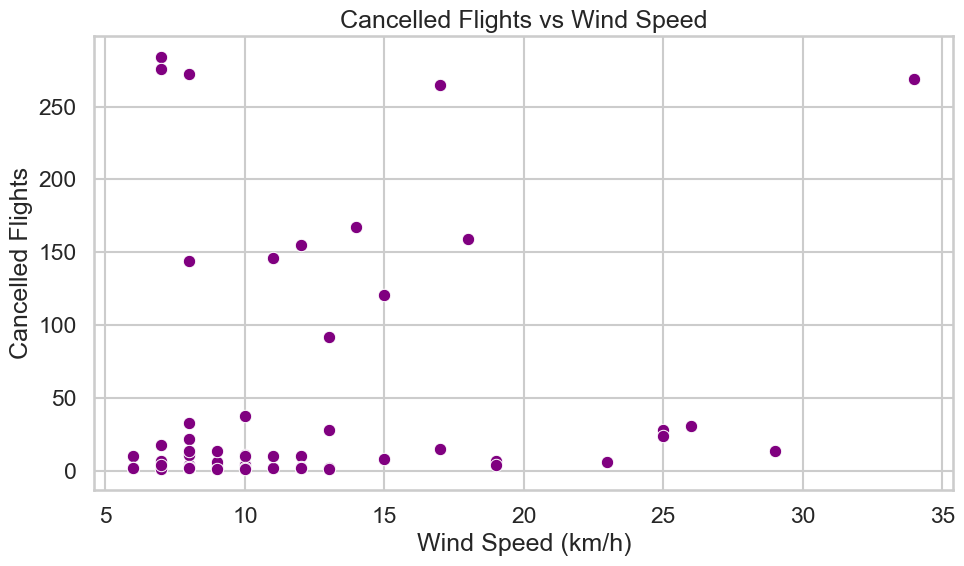

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("joined.csv", parse_dates=["date"])

# Set up the plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(data=df, x="speed", y="cancelled", color="purple", s=80)

# Add labels and title
plt.title("Cancelled Flights vs Wind Speed")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Cancelled Flights")
plt.tight_layout()
plt.show()


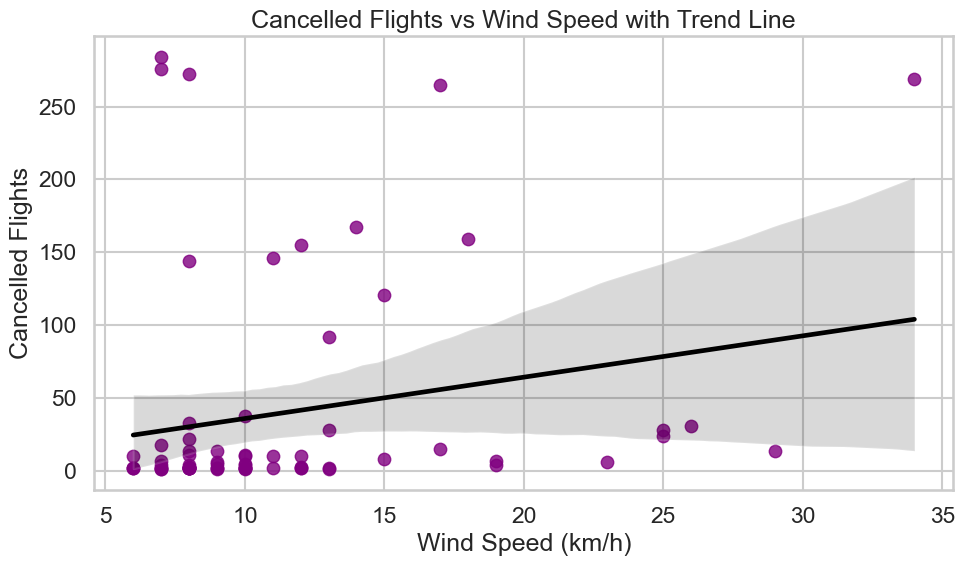

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("joined.csv", parse_dates=["date"])

# Set up the plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

# Scatter plot + regression line
sns.regplot(data=df, x="speed", y="cancelled", color="purple", scatter_kws={"s": 80}, line_kws={"color": "black"})

# Add labels and title
plt.title("Cancelled Flights vs Wind Speed with Trend Line")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Cancelled Flights")
plt.tight_layout()
plt.show()
